Some typical NumPy 'random' functions:

In [5]:
import numpy as np

# To generate a random float values between 0 and 1 (exclusive)
print(np.random.rand(3, 2)) # Creates a 3 x 2 matrix of random float values between 0 and 1 (exclusive)

# To generate random float values from standard normal distribution (mean = 0 and std = 1)
print(np.random.randn(5)) # Generates 5 random float values from standard normal distribution

# To generate random integer values within a range of values
print(np.random.randint(1, 100, 10)) # Generates 10 random integer values between 1 and 100 (exclusive)

# To randomly select an element from a given list of elements
print(np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9], size=3)) # Three random numbers from the given array will be chosen

# To generate a random sample of values from a normally distributed with a specified mean and standard deviation
print(np.random.normal(loc=0, scale=1, size=10)) # 10 random values will be generated from a normally distributed data where 0 (loc) is the mean and 1 (scale) is the standard deviation

# To set a seed for a random number generation to ensure you get the same results later as well
print(np.random.seed(42)) # This ensures that any random numbers generated in the program are same every time you run the program. The seed value '42' can be any other value

[[0.90303213 0.65541884]
 [0.44570465 0.60794578]
 [0.77936196 0.8441634 ]]
[-0.98866352 -0.47816068 -0.74201206  0.39212335  1.47095019]
[74 51 16 95 17 60 58 46 97 10]
[8 4 3]
[ 0.91971868 -0.26870703 -0.12180417 -0.89899353 -0.85513628  0.03461841
 -0.60262852  0.6537843   1.04704841 -0.40598987]
None


AIM #1: Generate a very large dataset
1. Generate a dataset of 1 million random data items between 1 and 100 items using only pandas
2. Generate a dataset of 1 million random data items between 1 and 100 using only NumPy
3. Calculate the time it takes for both the above operations. 
    3.1. Import the 'time' module, and use the time() function to calculate current time
    3.2. Which one is faster and why?

In [13]:
# Write your code for AIM #1 here
import pandas as pd
import numpy as np
import time

# 1. 
start_time_pandas = time.time()
pandas_data = pd.DataFrame(np.random.randint(1, 101, size=(1000000, 1)), columns=['RandomData'])
end_time_pandas = time.time()
pandas_time = end_time_pandas - start_time_pandas

# 2. 
start_time_numpy = time.time()
numpy_data = np.random.randint(1, 101, size=1000000)
end_time_numpy = time.time()
numpy_time = end_time_numpy - start_time_numpy

# 3. 
print(f"Time taken using pandas: {pandas_time:.6f} seconds")
print(f"Time taken using NumPy:  {numpy_time:.6f} seconds")

if pandas_time < numpy_time:
    print("Pandas is faster.")
else:
    print("NumPy is faster.")


Time taken using pandas: 0.008318 seconds
Time taken using NumPy:  0.000309 seconds
NumPy is faster.


Numpy is expected to be faster because it's optimized for numerical operations and doesn't involve the overhead of creating a DataFrame.

AIM #2: Basic statistics
For the given dataset on sleep health and lifestyle, do the following
1. Using only pandas, load the dataset, calculate mean 'Sleep Duration', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Heart Rate' and 'Daily Steps'.
2. Do the same as in Step 1 using only NumPy
3. Using only pandas, first calculate correlation (across only the numerical variables), and then separate correlation between...
    Sleep duration and Age
    Sleep duration and Heart rate
    Sleep duration and Daily steps
4. Using only NumPy, do the same as Step 3
5. Using pandas only, calculate standard deviation for 'Sleep Duration'. 
6. Usiong NumPy only, calculate standard deviation for 'Sleep Duration'. 
7. Calculate the time difference between using pandas and NumPy, right from the step of loading the dataset to the final standard deviation step. 
    5.1. Which one is faster and why?

In [7]:
# Write your code for AIM #2 here
import pandas as pd
import numpy as np
import time

#1. Using Pandas
print("Only Pandas: ")
# Start timer for Pandas
start_time_pandas = time.time()

# Load the dataset using Pandas
df = pd.read_csv('sleep_health.csv')

#1.1. pandas, load the dataset, calculate mean
mean_values_pandas = {
    'Sleep Duration': df['Sleep Duration'].mean(),
    'Systolic Blood Pressure': df['Systolic blood pressure'].mean(),
    'Diastolic Blood Pressure': df['Diastolic blood pressure'].mean(),
    'Heart Rate': df['Heart Rate'].mean(),
    'Daily Steps': df['Daily Steps'].mean()
}
print("Pandas Mean values:\n", mean_values_pandas)

#1.3. numpy, first calculate correlation (across only the numerical variables), and then separate correlation
correlation_matrix_pandas = df.select_dtypes(include='number').corr()
sleep_duration_age_pandas = correlation_matrix_pandas['Sleep Duration']['Age'] if 'Age' in correlation_matrix_pandas else None
sleep_duration_heart_rate_pandas = correlation_matrix_pandas['Sleep Duration']['Heart Rate'] if 'Heart Rate' in correlation_matrix_pandas else None
sleep_duration_daily_steps_pandas = correlation_matrix_pandas['Sleep Duration']['Daily Steps'] if 'Daily Steps' in correlation_matrix_pandas else None

print("\nPandas Correlation:")
print("Sleep Duration and Age:", sleep_duration_age_pandas)
print("Sleep Duration and Heart Rate:", sleep_duration_heart_rate_pandas)
print("Sleep Duration and Daily Steps:", sleep_duration_daily_steps_pandas)

#1.5. Pandas only, calculate standard deviation for 'Sleep Duration'. 
std_sleep_duration_pandas = df['Sleep Duration'].std()
print("\nPandas Standard Deviation of Sleep Duration:", std_sleep_duration_pandas)

# End timer for Pandas
end_time_pandas = time.time()
total_time_pandas = end_time_pandas - start_time_pandas
#print("\nTotal time taken using Pandas:", total_time_pandas, "seconds")



#2. Using NumPy
print("\n\nOnly Numpy: ",end = "")
# Start timer for NumPy
start_time_numpy = time.time()

# Loading the CSV file as an array in NumPy
data_numpy = np.genfromtxt('sleep_health.csv', delimiter=',', skip_header=0, dtype=None, encoding='utf-8', names=True)

# Create separate arrays for the individual columns that you want to operate on
# For example, to create a separate array for 'Age' column
age_numpy = data_numpy['Age'].astype(int)
sleep_duration_numpy = data_numpy['Sleep_Duration'].astype(float)
systolic_bp_numpy = data_numpy['Systolic_blood_pressure'].astype(float)
diastolic_bp_numpy = data_numpy['Diastolic_blood_pressure'].astype(float)
heart_rate_numpy = data_numpy['Heart_Rate'].astype(float)
daily_steps_numpy = data_numpy['Daily_Steps'].astype(float)

#2.2 numpy, load the dataset, calculate mean
mean_values_numpy = {
    'Sleep Duration': np.mean(sleep_duration_numpy),
    'Systolic Blood Pressure': np.mean(systolic_bp_numpy),
    'Diastolic Blood Pressure': np.mean(diastolic_bp_numpy),
    'Heart Rate': np.mean(heart_rate_numpy),
    'Daily Steps': np.mean(daily_steps_numpy)
}
print("\nNumPy Mean values:\n", mean_values_numpy)

# Calculate the correlation in NumPy using np.corrcoef()
#2.4. numpy, first calculate correlation (across only the numerical variables), and then separate correlation
correlation_matrix_numpy = np.corrcoef([sleep_duration_numpy, age_numpy, heart_rate_numpy, daily_steps_numpy])
# The correlation coefficient is located in the off-diagonal elements [0,1] or [1,0]
sleep_duration_age_numpy = correlation_matrix_numpy[0, 1]
sleep_duration_heart_rate_numpy = correlation_matrix_numpy[0, 2]
sleep_duration_daily_steps_numpy = correlation_matrix_numpy[0, 3]

print("\nNumPy Correlation:")
print("Sleep Duration and Age:", sleep_duration_age_numpy)
print("Sleep Duration and Heart Rate:", sleep_duration_heart_rate_numpy)
print("Sleep Duration and Daily Steps:", sleep_duration_daily_steps_numpy)

# Use np-std() to calculate Standard deviation
#2.6. NumPy only, calculate standard deviation for 'Sleep Duration'. 
std_sleep_duration_numpy = np.std(sleep_duration_numpy)
print("\nNumPy Standard Deviation of Sleep Duration:", std_sleep_duration_numpy)

# End timer for NumPy
end_time_numpy = time.time()
total_time_numpy = end_time_numpy - start_time_numpy

#7.Calculate the time difference between using pandas and NumPy
print("\nCalculate the time difference between using pandas and NumPy:")
print("Total time taken using Pandas:", total_time_pandas, "seconds")
print("Total time taken using NumPy: ", total_time_numpy, "seconds")

#7.1 Which one is faster and why?
if total_time_pandas < total_time_numpy:
    print("Pandas is faster.")
else:
    print("NumPy is faster.")


Only Pandas: 
Pandas Mean values:
 {'Sleep Duration': np.float64(7.132085561497325), 'Systolic Blood Pressure': np.float64(128.55347593582889), 'Diastolic Blood Pressure': np.float64(84.64973262032086), 'Heart Rate': np.float64(70.16577540106952), 'Daily Steps': np.float64(6816.844919786096)}

Pandas Correlation:
Sleep Duration and Age: 0.3447093581647443
Sleep Duration and Heart Rate: -0.516454888517144
Sleep Duration and Daily Steps: -0.039532537675731685

Pandas Standard Deviation of Sleep Duration: 0.7956567308898189


Only Numpy: 
NumPy Mean values:
 {'Sleep Duration': np.float64(7.132085561497325), 'Systolic Blood Pressure': np.float64(128.55347593582889), 'Diastolic Blood Pressure': np.float64(84.64973262032086), 'Heart Rate': np.float64(70.16577540106952), 'Daily Steps': np.float64(6816.844919786096)}

NumPy Correlation:
Sleep Duration and Age: 0.34470935816474424
Sleep Duration and Heart Rate: -0.5164548885171424
Sleep Duration and Daily Steps: -0.039532537675732504

NumPy Sta

Pandas is faster. Pandas is optimized for processing tabular data, especially when calculating mean and standard deviation, so its benefits are even more pronounced in more complex data analysis scenarios.

AIM #3: Use suitable plots to visualize the data

1. Using only pandas (and matplotlib/seaborn if necessary) plot the distribution for
    1.1. Age
    1.2. Sleep Duration
    1.3. Quality of Sleep
    1.4. Physical Activity Level
    1.5. Stress Level
    1.6. Heart Rate
2. Using only NumPy, do the same as Step 1. You will need matplotlib for this
3. Using only pandas, use the appropriate plot to
    3.1. See the distribution of 'Sleep Duration' based on 'Quality of Sleep'
    3.2. See the distribution of 'Sleep Duration' based on 'Stress Level'
    3.3. See the distribution of 'Sleep Duration' based on 'Physical Activity Level'
    3.4. See the distribution of 'Sleep Duration' based on 'Occupation'
    3.5. See the distribution of 'Sleep Duration' based on 'BMI'
4. Using only NumPy, do the same as Step 3. You will need matplotlib for this
5. Using only pandas, use a suitable plot to see the relation between
    5.1. Age and Sleep Duration
    5.2. Sleep Duration and Heart Rate
    5.3. Heart Rate and Daily Steps
    5.4. Sleep Duration and Daily Steps
6. Using only NumPy, do the same as Step 5. You will need matplotlib for this 
7. Find the time difference between plotting using only pandas, and plotting using NumPy

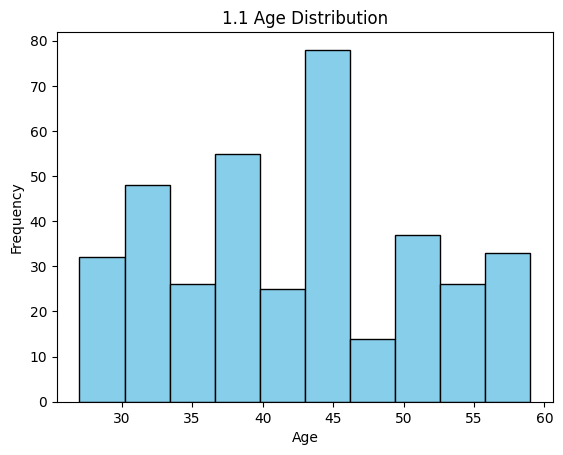

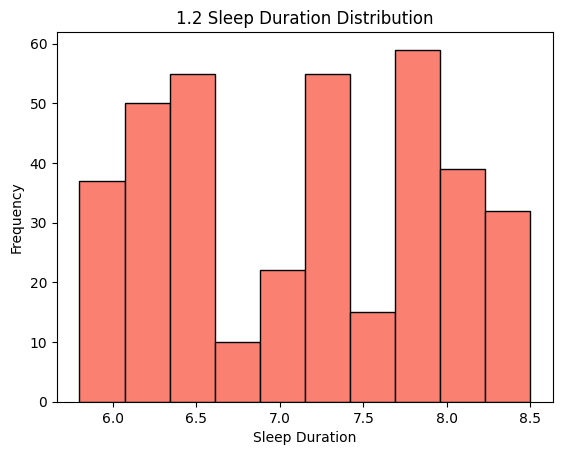

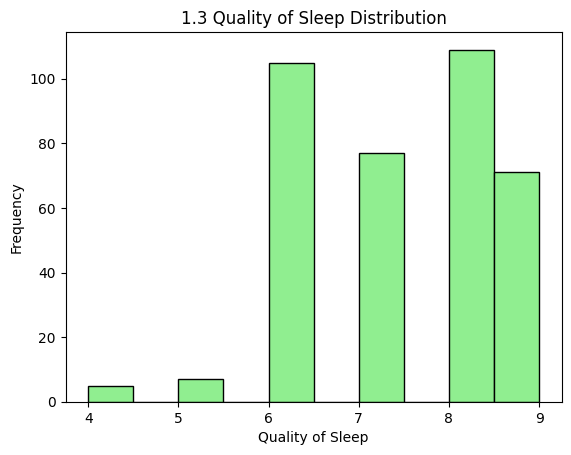

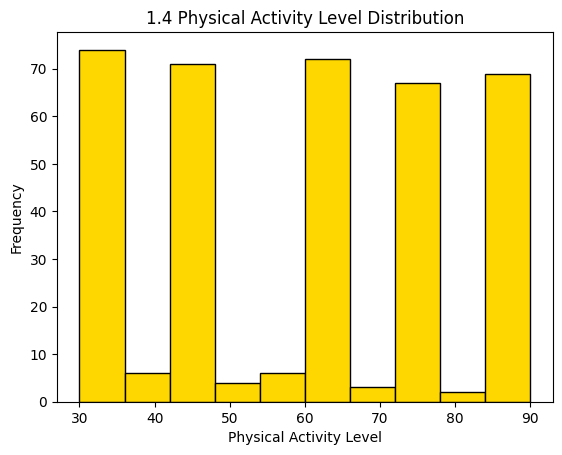

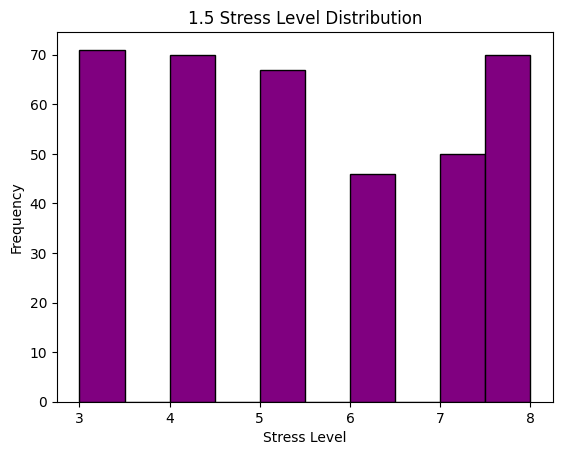

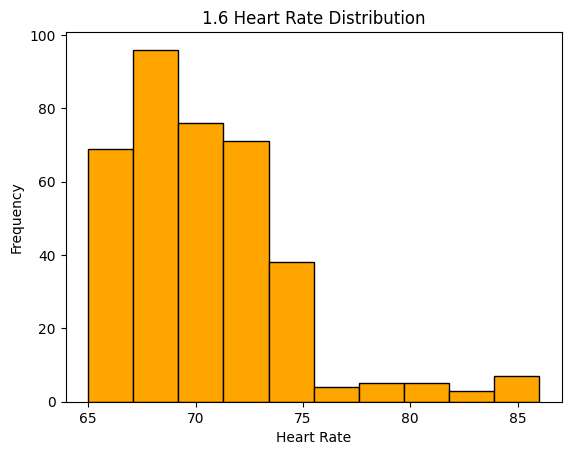

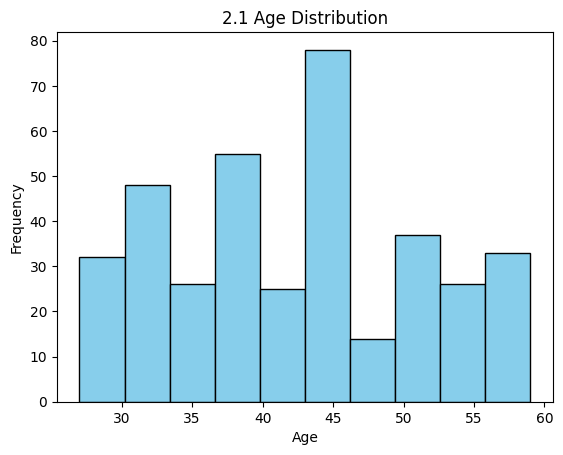

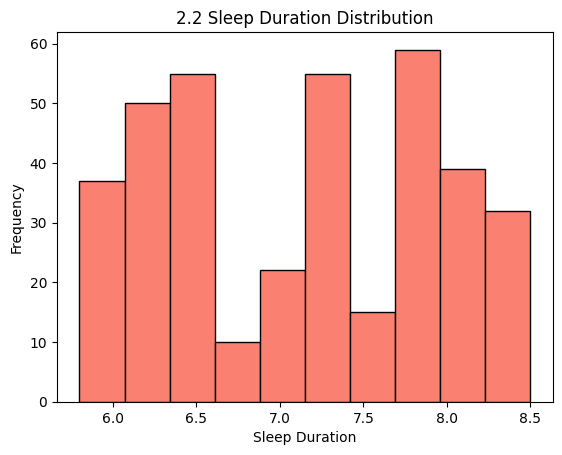

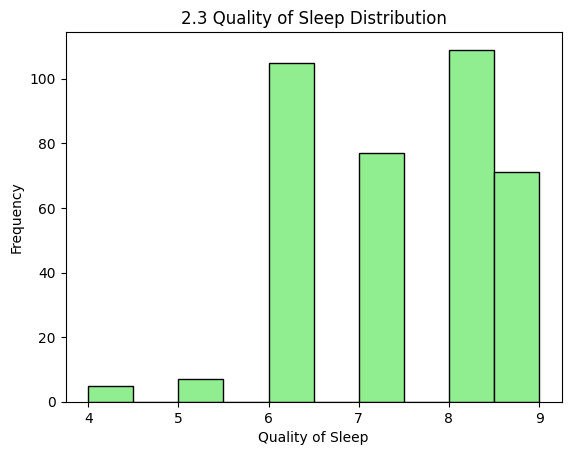

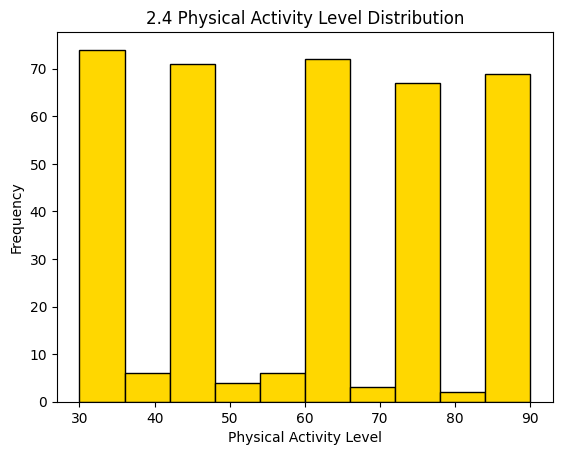

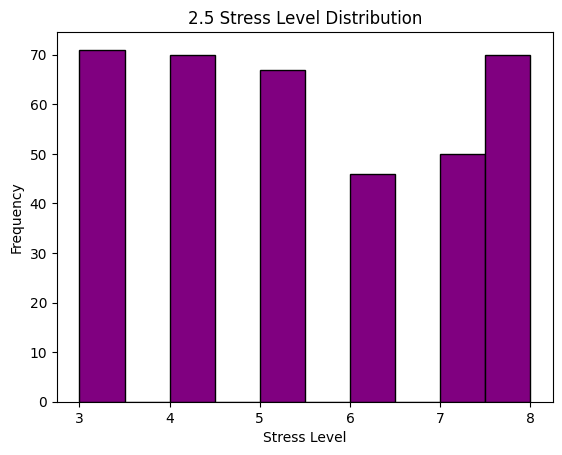

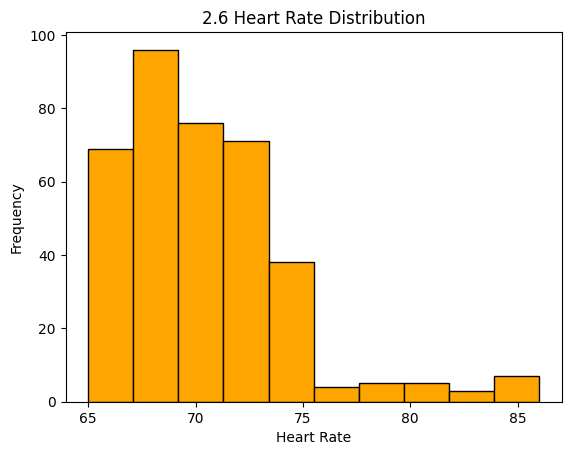

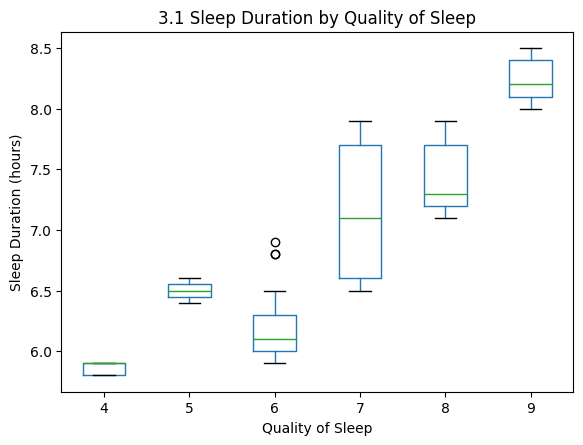

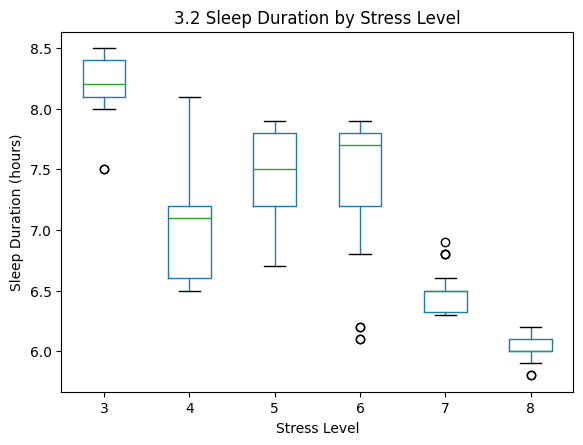

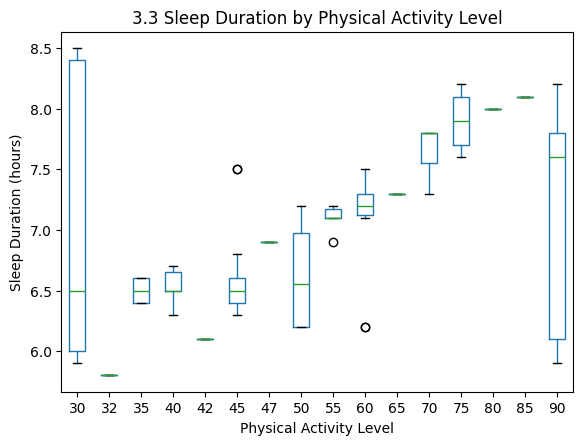

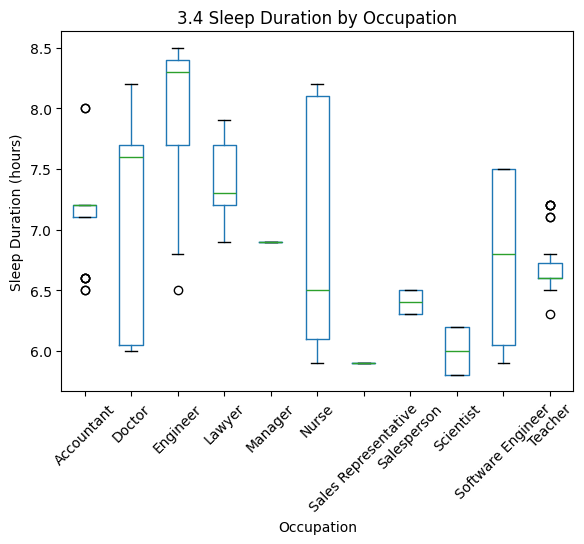

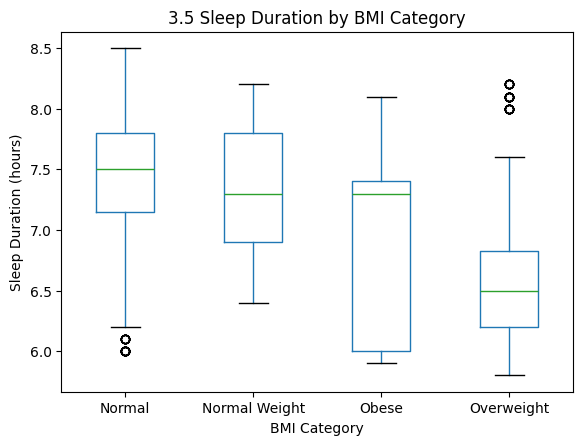

C:\Users\Karen\AppData\Local\Temp\ipykernel_13664\1821058501.py:132: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(sleep_duration_quality, labels=np.unique(data['Quality of Sleep']))


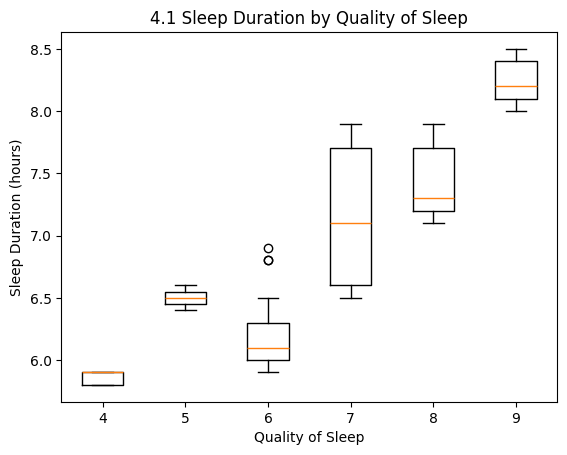

C:\Users\Karen\AppData\Local\Temp\ipykernel_13664\1821058501.py:141: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(sleep_duration_stress, labels=np.unique(data['Stress Level']))


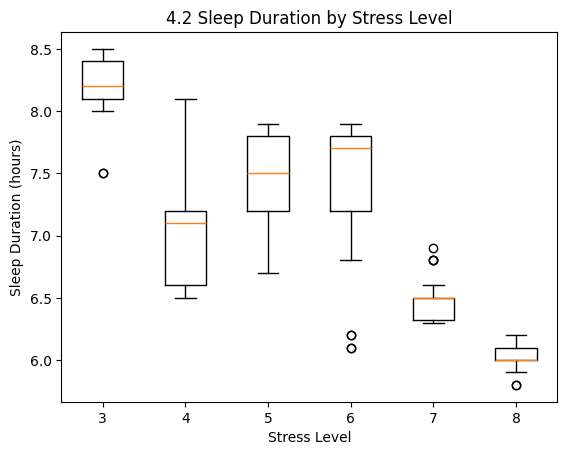

C:\Users\Karen\AppData\Local\Temp\ipykernel_13664\1821058501.py:150: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(sleep_duration_activity, labels=np.unique(data['Physical Activity Level']))


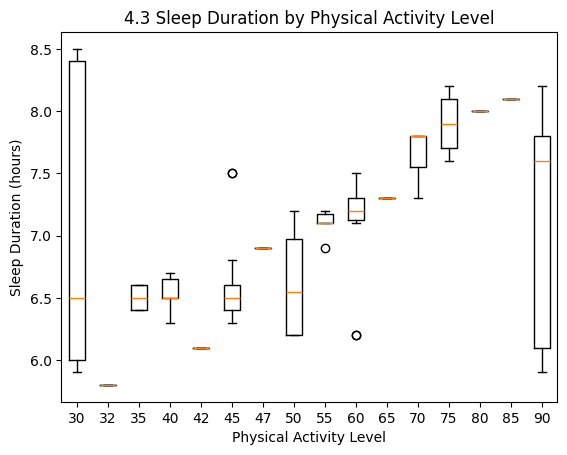

C:\Users\Karen\AppData\Local\Temp\ipykernel_13664\1821058501.py:159: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(sleep_duration_occupation, labels=np.unique(data['Occupation']))


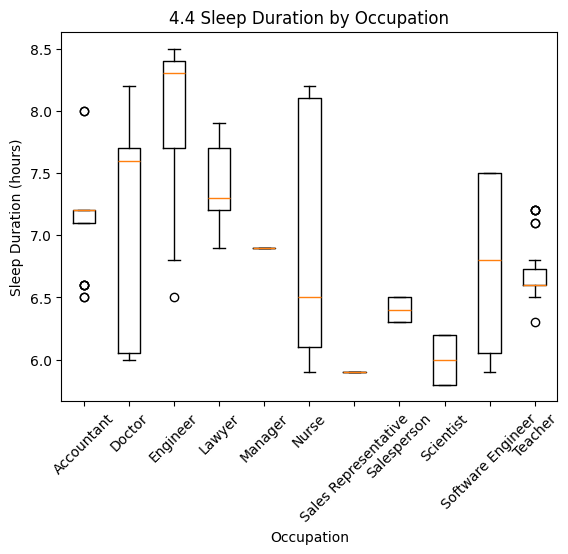

C:\Users\Karen\AppData\Local\Temp\ipykernel_13664\1821058501.py:169: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(sleep_duration_bmi, labels=np.unique(data['BMI Category']))


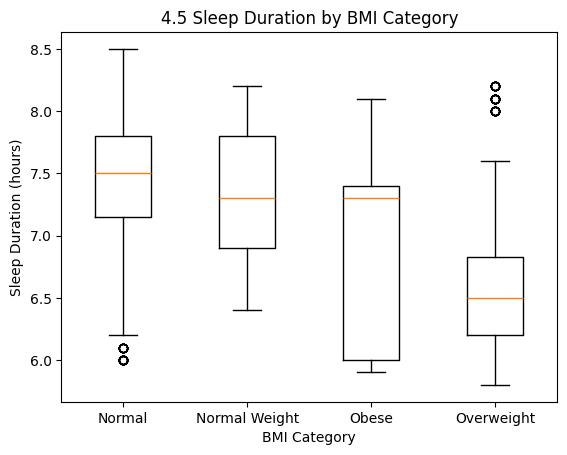

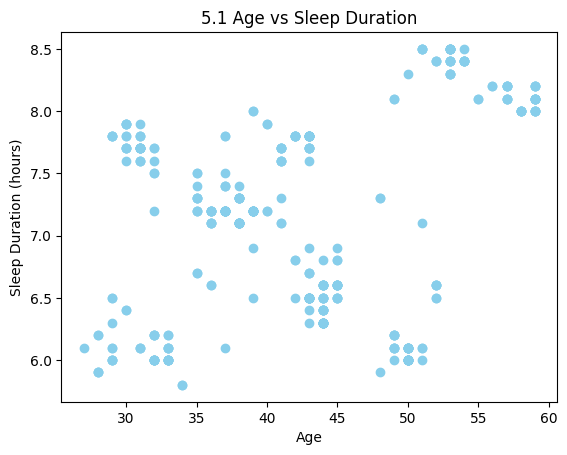

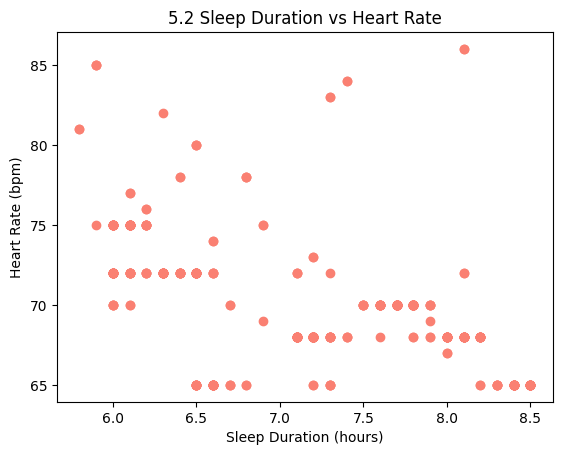

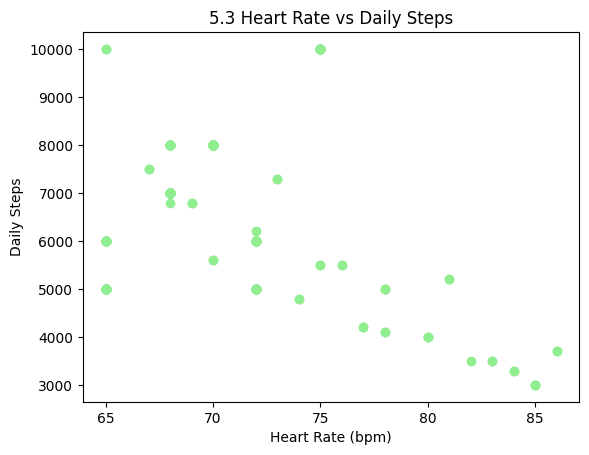

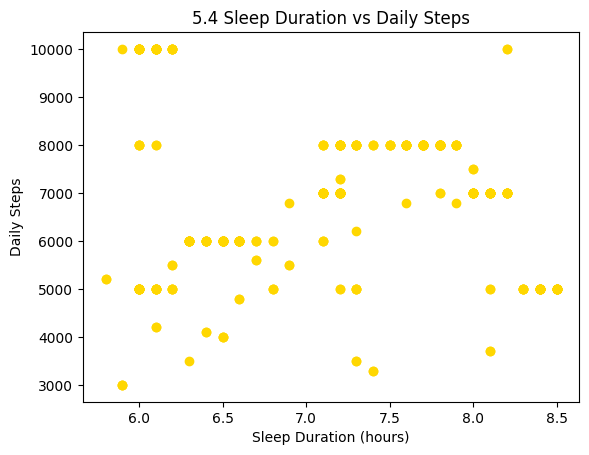

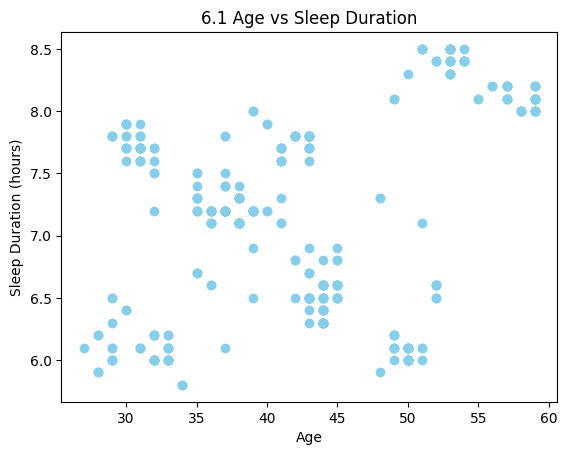

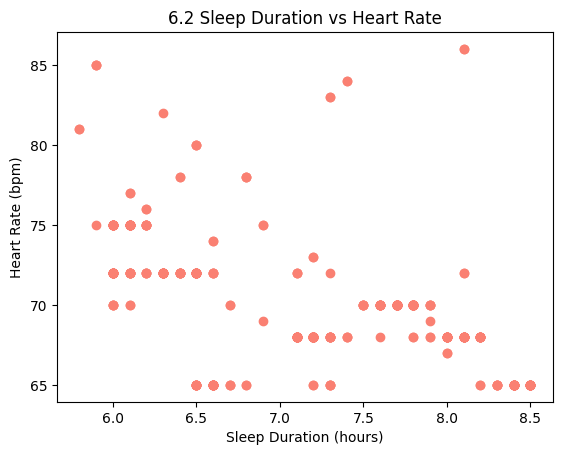

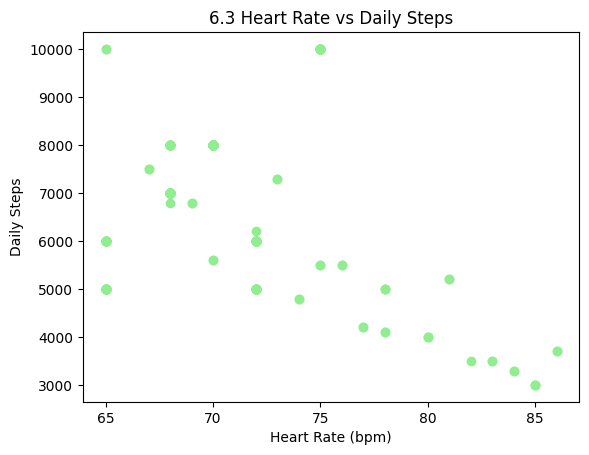

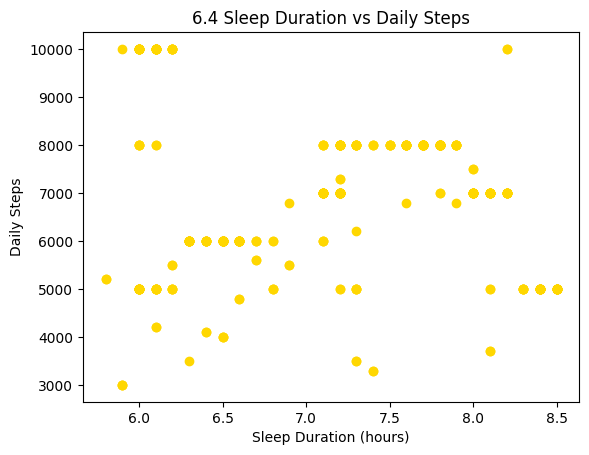

Time taken using pandas: 1.1576 seconds
Time taken using NumPy: 1.1534 seconds
The time difference between plotting using only pandas, and plotting using NumPy is: 0.0042 seconds


In [8]:
# Write your code for AIM #3 here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

data = pd.read_csv('sleep_health.csv')

start_time_pandas1 = time.time()
# 1. Using only pandas
# 1.1 Age
plt.hist(data['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('1.1 Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 1.2 Sleep Duration
plt.hist(data['Sleep Duration'], bins=10, color='salmon', edgecolor='black')
plt.title('1.2 Sleep Duration Distribution')
plt.xlabel('Sleep Duration')
plt.ylabel('Frequency')
plt.show()  

# 1.3 Quality of Sleep
plt.hist(data['Quality of Sleep'], bins=10, color='lightgreen', edgecolor='black')
plt.title('1.3 Quality of Sleep Distribution')
plt.xlabel('Quality of Sleep')
plt.ylabel('Frequency')
plt.show()  

# 1.4 Physical Activity Level
plt.hist(data['Physical Activity Level'], bins=10, color='gold', edgecolor='black')
plt.title('1.4 Physical Activity Level Distribution')
plt.xlabel('Physical Activity Level')
plt.ylabel('Frequency')
plt.show()  

# 1.5 Stress Level
plt.hist(data['Stress Level'], bins=10, color='purple', edgecolor='black')
plt.title('1.5 Stress Level Distribution')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.show()  

# 1.6 Heart Rate
plt.hist(data['Heart Rate'], bins=10, color='orange', edgecolor='black')
plt.title('1.6 Heart Rate Distribution')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.show()  
end_time_pandas1 = time.time()

start_time_numpy2 = time.time()
# 2. Using only NumPy
def plot_histogram(data, column, color, title, xlabel, ylabel):
    values, bins = np.histogram(data[column], bins=10)
    plt.hist(bins[:-1], bins, weights=values, color=color, edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# 2.1 Age
plot_histogram(data, 'Age', 'skyblue', '2.1 Age Distribution', 'Age', 'Frequency')

# 2.2 Sleep Duration
plot_histogram(data, 'Sleep Duration', 'salmon', '2.2 Sleep Duration Distribution', 'Sleep Duration', 'Frequency')

# 2.3 Quality of Sleep
plot_histogram(data, 'Quality of Sleep', 'lightgreen', '2.3 Quality of Sleep Distribution', 'Quality of Sleep', 'Frequency')

# 2.4 Physical Activity Level
plot_histogram(data, 'Physical Activity Level', 'gold', '2.4 Physical Activity Level Distribution', 'Physical Activity Level', 'Frequency')

# 2.5 Stress Level
plot_histogram(data, 'Stress Level', 'purple', '2.5 Stress Level Distribution', 'Stress Level', 'Frequency')

# 2.6 Heart Rate
plot_histogram(data, 'Heart Rate', 'orange', '2.6 Heart Rate Distribution', 'Heart Rate', 'Frequency')
end_time_numpy2 = time.time()

start_time_pandas3 = time.time()
# 3. Using only pandas
# 3.1 Sleep Duration based on Quality of Sleep
data.boxplot(column='Sleep Duration', by='Quality of Sleep', grid=False)
plt.title('3.1 Sleep Duration by Quality of Sleep')
plt.suptitle('')
plt.xlabel('Quality of Sleep')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 3.2 Sleep Duration based on Stress Level
data.boxplot(column='Sleep Duration', by='Stress Level', grid=False)
plt.title('3.2 Sleep Duration by Stress Level')
plt.suptitle('')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 3.3 Sleep Duration based on Physical Activity Level
data.boxplot(column='Sleep Duration', by='Physical Activity Level', grid=False)
plt.title('3.3 Sleep Duration by Physical Activity Level')
plt.suptitle('')
plt.xlabel('Physical Activity Level')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 3.4 Sleep Duration based on Occupation
data.boxplot(column='Sleep Duration', by='Occupation', grid=False)
plt.title('3.4 Sleep Duration by Occupation')
plt.suptitle('')
plt.xlabel('Occupation')
plt.ylabel('Sleep Duration (hours)')
plt.xticks(rotation=45)  # 旋转x轴标签以便更好地查看
plt.show()

# 3.5 Sleep Duration based on BMI Category
data.boxplot(column='Sleep Duration', by='BMI Category', grid=False)
plt.title('3.5 Sleep Duration by BMI Category')
plt.suptitle('')
plt.xlabel('BMI Category')
plt.ylabel('Sleep Duration (hours)')
plt.show()
end_time_pandas3 = time.time()

start_time_numpy4 = time.time()
# 4. Using only NumPy
# 4.1 Sleep Duration based on Quality of Sleep
sleep_duration_quality = [data['Sleep Duration'][data['Quality of Sleep'] == quality].to_numpy() for quality in np.unique(data['Quality of Sleep'])]

plt.boxplot(sleep_duration_quality, labels=np.unique(data['Quality of Sleep']))
plt.title('4.1 Sleep Duration by Quality of Sleep')
plt.xlabel('Quality of Sleep')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 4.2 Sleep Duration based on Stress Level
sleep_duration_stress = [data['Sleep Duration'][data['Stress Level'] == stress].to_numpy() for stress in np.unique(data['Stress Level'])]

plt.boxplot(sleep_duration_stress, labels=np.unique(data['Stress Level']))
plt.title('4.2 Sleep Duration by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 4.3 Sleep Duration based on Physical Activity Level
sleep_duration_activity = [data['Sleep Duration'][data['Physical Activity Level'] == activity].to_numpy() for activity in np.unique(data['Physical Activity Level'])]

plt.boxplot(sleep_duration_activity, labels=np.unique(data['Physical Activity Level']))
plt.title('4.3 Sleep Duration by Physical Activity Level')
plt.xlabel('Physical Activity Level')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 4.4 Sleep Duration based on Occupation
sleep_duration_occupation = [data['Sleep Duration'][data['Occupation'] == occupation].to_numpy() for occupation in np.unique(data['Occupation'])]

plt.boxplot(sleep_duration_occupation, labels=np.unique(data['Occupation']))
plt.title('4.4 Sleep Duration by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Sleep Duration (hours)')
plt.xticks(rotation=45)
plt.show()

# 4.5 Sleep Duration based on BMI Category
sleep_duration_bmi = [data['Sleep Duration'][data['BMI Category'] == bmi].to_numpy() for bmi in np.unique(data['BMI Category'])]

plt.boxplot(sleep_duration_bmi, labels=np.unique(data['BMI Category']))
plt.title('4.5 Sleep Duration by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Sleep Duration (hours)')
plt.show()
end_time_numpy4 = time.time()

start_time_pandas5 = time.time()
# 5. Using only pandas
# 5.1 Age and Sleep Duration
plt.scatter(data['Age'], data['Sleep Duration'], color='skyblue')
plt.title('5.1 Age vs Sleep Duration')
plt.xlabel('Age')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 5.2 Sleep Duration and Heart Rate
plt.scatter(data['Sleep Duration'], data['Heart Rate'], color='salmon')
plt.title('5.2 Sleep Duration vs Heart Rate')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Heart Rate (bpm)')
plt.show()

# 5.3 Heart Rate and Daily Steps
plt.scatter(data['Heart Rate'], data['Daily Steps'], color='lightgreen')
plt.title('5.3 Heart Rate vs Daily Steps')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Daily Steps')
plt.show()

# 5.4 Sleep Duration and Daily Steps
plt.scatter(data['Sleep Duration'], data['Daily Steps'], color='gold')
plt.title('5.4 Sleep Duration vs Daily Steps')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Daily Steps')
plt.show()
end_time_pandas5 = time.time()

start_time_numpy6 = time.time()
# 6. Using only NumPy
# 6.1 Age and Sleep Duration
plt.scatter(data['Age'].to_numpy(), data['Sleep Duration'].to_numpy(), color='skyblue')
plt.title('6.1 Age vs Sleep Duration')
plt.xlabel('Age')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 6.2 Sleep Duration and Heart Rate
plt.scatter(data['Sleep Duration'].to_numpy(), data['Heart Rate'].to_numpy(), color='salmon')
plt.title('6.2 Sleep Duration vs Heart Rate')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Heart Rate (bpm)')
plt.show()

# 6.3 Heart Rate and Daily Steps
plt.scatter(data['Heart Rate'].to_numpy(), data['Daily Steps'].to_numpy(), color='lightgreen')
plt.title('6.3 Heart Rate vs Daily Steps')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Daily Steps')
plt.show()

# 6.4 Sleep Duration and Daily Steps
plt.scatter(data['Sleep Duration'].to_numpy(), data['Daily Steps'].to_numpy(), color='gold')
plt.title('6.4 Sleep Duration vs Daily Steps')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Daily Steps')
plt.show()
end_time_numpy6 = time.time()

pandas_duration = end_time_pandas1 + end_time_pandas3 + end_time_pandas5 - start_time_pandas1 - start_time_pandas3 - start_time_pandas5
numpy_duration = end_time_numpy2 + end_time_numpy4 + end_time_numpy6 - start_time_numpy2 - start_time_numpy4 - start_time_numpy6
time_difference = pandas_duration - numpy_duration

# 7. Find the time difference between plotting using only pandas, and plotting using NumPy
print(f"Time taken using pandas: {pandas_duration:.4f} seconds")
print(f"Time taken using NumPy: {numpy_duration:.4f} seconds")
print(f"The time difference between plotting using only pandas, and plotting using NumPy is: {time_difference:.4f} seconds")
#To count unique values and their total count in a NumPy array, use 
# np.unique(array_name, return_counts=True)--- This will return two values, one is the unique values and the other is the total count of each unique value
# You will need this for plotting bar plots

# For box plots in NumPy you will need to 
# create a list of variable1, grouped by the unique value of some variable2 (nominal or ordinal), 
# Syntax: variable1_list = [variable1[variable2 == i] for i in np.unique(variable2)]


AIM #4: Other possible plotting

1. Think of other possible plots to show some interesting distribution and relations. Do this using both pandas and NumPy



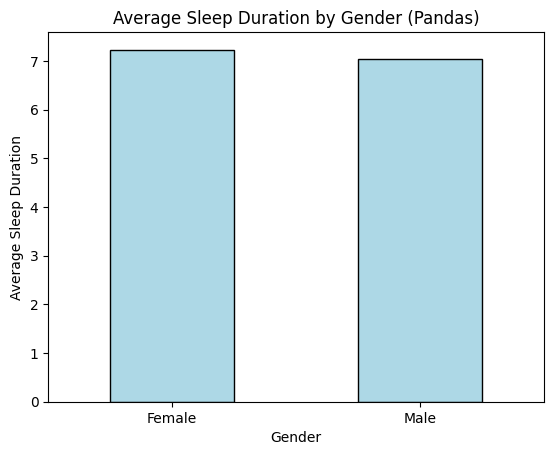

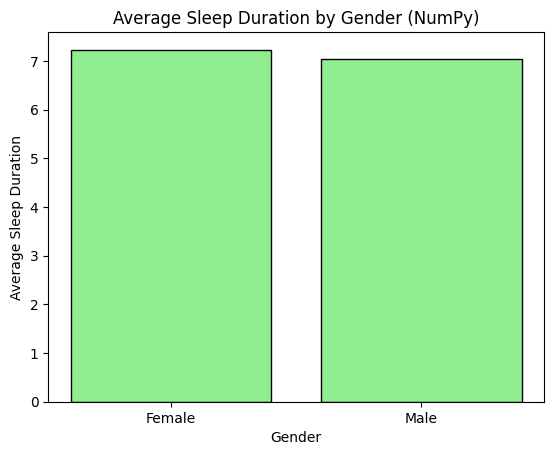

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('sleep_health.csv')

# Use Pandas to calculate the average hours of sleep grouped by gender
mean_sleep_duration = data.groupby('Gender')['Sleep Duration'].mean()

mean_sleep_duration.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Average Sleep Duration by Gender (Pandas)')
plt.xlabel('Gender')
plt.ylabel('Average Sleep Duration')
plt.xticks(rotation=0)  
plt.show()

# Use NumPy to calculate the average hours of sleep grouped by gender
genders = np.unique(data['Gender'])
mean_sleep_duration = [np.mean(data['Sleep Duration'][data['Gender'] == gender].to_numpy()) for gender in genders]

plt.bar(genders, mean_sleep_duration, color='lightgreen', edgecolor='black')
plt.title('Average Sleep Duration by Gender (NumPy)')
plt.xlabel('Gender')
plt.ylabel('Average Sleep Duration')
plt.xticks(rotation=0)  
plt.show()
